In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])
raw=pd.read_csv('./london_crime_by_lsoa.csv')
raw

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [31]:
raw.info()
YM = raw.groupby(['year','month'],axis=0)['value'].sum()
Y = raw.groupby(['year'],axis=0)['value'].sum()
M = raw.groupby(['month'],axis=0)['value'].sum()
#for i in list(raw):
#    print (raw[i].tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


1. Line graph --> perkembangan kasus total per bulan per tahun

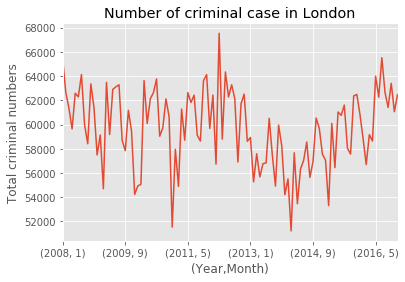

In [41]:
YM.plot(kind='line')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('(Year,Month)')
plt.show()

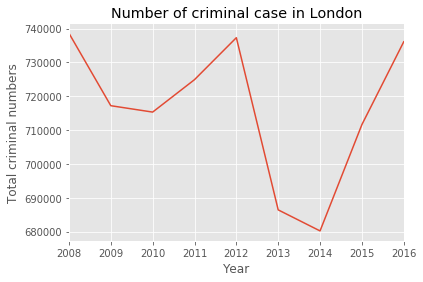

In [38]:
Y.plot(kind='line')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('Year')
plt.show()

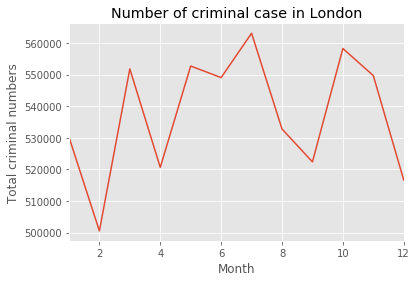

In [42]:
M.plot(kind='line')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('Month')
plt.show()

2. Pie chart --> category dengan total crime paling besar

In [67]:
pie = raw.copy()
pie_cat = pie.groupby('major_category',axis=0).sum()

pie_cat

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


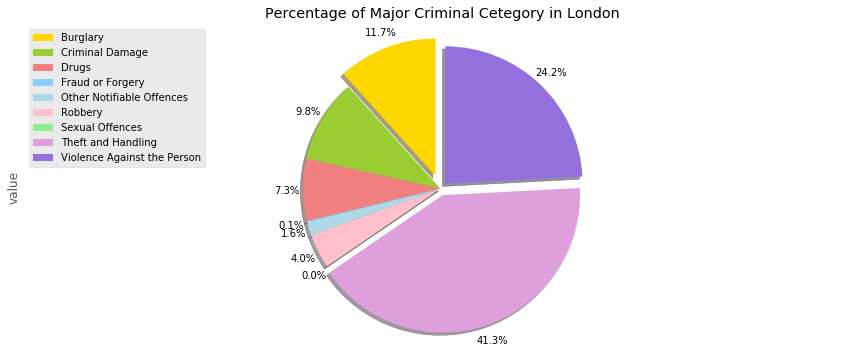

In [89]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue',
              'lightblue','pink','lightgreen','plum','mediumpurple']
explode_list = [0.1,0,0,0,0,0,0,0.05,0.05]
pie_cat['value'].plot(kind='pie', 
                      figsize=(15,6),
                      autopct='%1.1f%%', 
                      startangle=90,
                      shadow=True,
                      labels=None,
                      pctdistance=1.12,
                      colors=colors_list,
                      explode=explode_list)
plt.title('Percentage of Major Criminal Cetegory in London')
plt.axis('equal')
plt.legend(labels=pie_cat.index,loc='upper left')
plt.show()

3. Bar chart --> - city total crime yang paling besar siapa

In [98]:
pie = raw.copy()
bar_bor = pie.groupby('borough',axis=0).sum()
bar_bor.sort_values(by='value',ascending=True,inplace=True)
bar_bor_top10=bar_bor['value'].tail(10)
bar_bor_top10

borough
Brent            227551
Tower Hamlets    228613
Islington        230286
Ealing           251562
Croydon          260294
Newham           262024
Camden           275147
Southwark        278809
Lambeth          292178
Westminster      455028
Name: value, dtype: int64

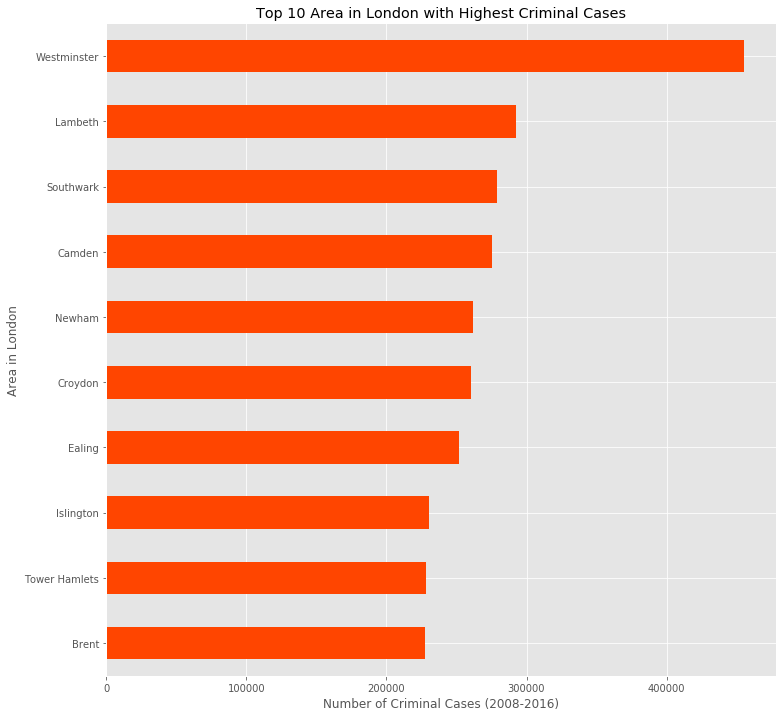

In [101]:
bar_bor_top10.plot(kind='barh',figsize=(12,12),color='orangered')
plt.xlabel('Number of Criminal Cases (2008-2016)')
plt.ylabel('Area in London')
plt.title('Top 10 Area in London with Highest Criminal Cases')
plt.show()

Text(0.5, 1.0, 'Criminal Cases in Westminster ($x 10^{8}$)')

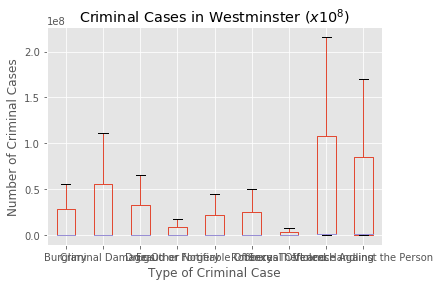

In [169]:
bar = raw.copy()
bar.head()
bar_box = bar.set_index('borough')
#bar_box.boxplot(by ='major_category', column =['value'], grid = False) 
bar_boxx = bar_box.loc['Westminster']
bar_boxxx = bar_boxx.groupby(['major_category'],axis=0).sum().transpose()
bar_boxxx.plot(kind='box')
plt.xlabel('Type of Criminal Case')
plt.ylabel('Number of Criminal Cases')
plt.title('Criminal Cases in Westminster ($x 10^{8}$)')

#bar_box_wet = bar_box.loc['Westminster'].plot(kind='box')

#bar_box.set_indexbar_bor_country = bar_bor.
#.plot(kind='box',figsize=(12,12),color='orangered')